In [56]:
'''
利用岭回归/gridSearchCV做拟合
'''

'\n\xe5\x88\xa9\xe7\x94\xa8\xe5\xb2\xad\xe5\x9b\x9e\xe5\xbd\x92/gridSearchCV\xe5\x81\x9a\xe6\x8b\x9f\xe5\x90\x88\n'

In [57]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [58]:
data = pd.read_csv('Advertising.csv', header=0)

In [59]:
print data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


In [60]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

print X.shape, y.shape

(200, 3) (200L,)


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

In [62]:
X_train, x_test, y_train, y_test = \
    train_test_split(X, y, train_size=0.8, random_state=1)

## 拟合

In [63]:
model = Ridge()
alpha_can = np.linspace(-3,5,20)
print 'alpha_can =', alpha_can

grid_search = GridSearchCV(model, param_grid={'alpha':alpha_can}, cv=5)
grid_search.fit(X_train, y_train)
print '超参数:', grid_search.best_params_

alpha_can = [-3.         -2.57894737 -2.15789474 -1.73684211 -1.31578947 -0.89473684
 -0.47368421 -0.05263158  0.36842105  0.78947368  1.21052632  1.63157895
  2.05263158  2.47368421  2.89473684  3.31578947  3.73684211  4.15789474
  4.57894737  5.        ]
超参数: {'alpha': 5.0}


## 预测

In [64]:
order = y_test.argsort(axis=0)
y_test = y_test.values[order]
x_test = x_test.values[order, :]

y_pred = grid_search.predict(x_test)
print 'score =', grid_search.score(x_test, y_test)
mse = np.average((y_pred - np.array(y_test)) ** 2)
rmse = np.sqrt(mse)
print mse, rmse

score = 0.892730685909
1.99244102336 1.4115385306


## 绘图

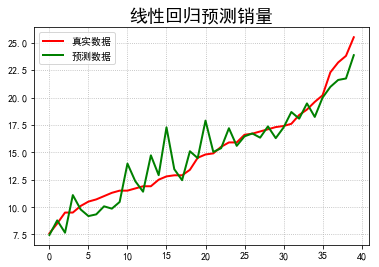

In [65]:
t = np.arange(len(x_test))
mpl.rcParams['font.sans-serif'] = [u'simHei']

plt.plot(t, y_test, 'r-',linewidth=2, label=u'真实数据')
plt.plot(t, y_pred, 'g-',linewidth=2, label=u'预测数据')
plt.legend(loc='best')
plt.title(u'线性回归预测销量', fontsize=18)
plt.grid(b=True,ls=':')
plt.show()